In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, classification_report,silhouette_score
from time import time
import string
import re
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')


# ***Data Preprocessing Steps***
####        removal/filling of null values
####        removal of duplicate values
####        removing outliers
####        standardization & scaling
####        encoding categorical variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44586 entries, 0 to 44585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      44586 non-null  int64 
 1   full_text  44586 non-null  object
dtypes: int64(1), object(1)
memory usage: 696.8+ KB


In [4]:
df.dtypes

label         int64
full_text    object
dtype: object

In [5]:
# no.of rows, no.of columns  of the dataframe
df.shape

(44586, 2)

In [6]:
# Checking of null values
# df.isna().any()
df.isnull().sum()

label        0
full_text    0
dtype: int64

In [7]:
df.describe()

,label
count,44586.000000
mean,0.590701
std,0.491710
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df= df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df['classification']=df['label'].replace(1,'Bullying')
df['classification']=df['classification'].replace(0,'Non-Bullying')

In [11]:
df['classification'].value_counts()

classification
Bullying        25162
Non-Bullying    17401
Name: count, dtype: int64

# Apply LabelEncoder

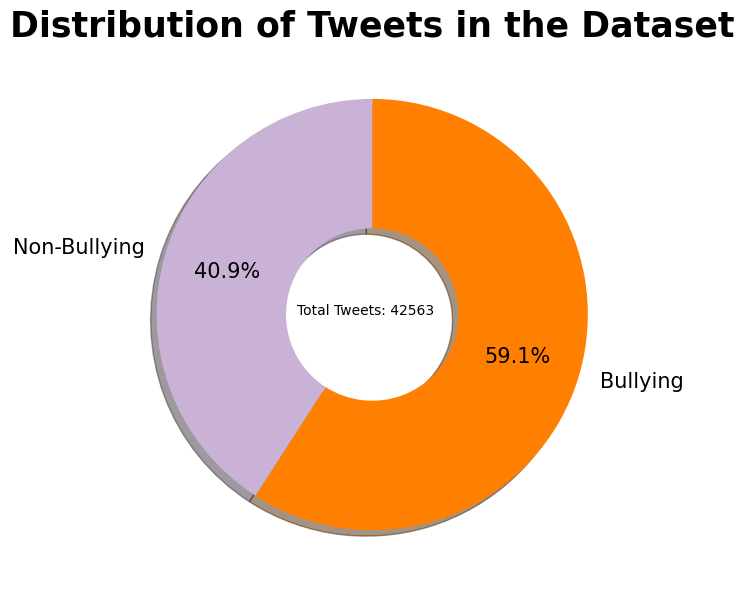

In [12]:
plt.figure(figsize = (7,7))
sorted_counts = df['classification'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontweight= 'bold', fontsize = 25);

# ***Text Cleansing or Preprocessing***


In [13]:
# !pip install nltk
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
nltk.download('omw-1.4')
from nltk import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
corpus = [] # empty list
for text in df['full_text']:
    filtered_text = text.lower() # filtered_text is a sring type
    filtered_text = re.sub('[^a-zA-Z]', ' ', filtered_text)
    filtered_text = word_tokenize(filtered_text, preserve_line=True) # will handle the empty spaces also
    filtered_text = [word for word in filtered_text if word not in stopwords]
    filtered_text = [lm.lemmatize(word) for word in filtered_text] # it returns a list of words, 
    filtered_text = " ".join(filtered_text) # and to join these words to form a sentence 
    corpus.append(filtered_text)

In [15]:
print(corpus)

['drasko said impressed girl cooked half chicken cooked', 'drasko didnt cook half bird idiot', 'hopefully cook drasko ep', 'course born serbiayoure fucked serbian film', 'girl equivalent irritating asian girl couple year ago well done', 'lost plot wheres big texan elephant sized steak brekkie', 'sir winston churchhill islam dangerous man rabies dog', 'giuliani watched city attacked amp people jump death entitled wtf want guy shield', 'youre tiny bit racist rt im racist dick', 'santa white', 'eric holder understand mistrust attorney general black man', 'spent morning board election getting mapsdata start registering black person ht', 'testimony darren wilson said thought look like demon shot mike brown ironic word', 'cant server restaurant beard make look like terrorist everyone laugh', 'people talk white privilege majority food stamp recipient white people', 'clear white boy singing abt hanging nigger got police protection black ppl chanting black life matter got', 'bet race pimp enjoy

# Applying CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
count_vector = CountVectorizer(max_features=5000) # counting the total no.of unique words from the corpus
sparse_matrix = count_vector.fit_transform(corpus).toarray()
print(sparse_matrix.shape)

(42563, 5000)


In [18]:
x = sparse_matrix
y = df['label']
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


# ***Splitting the dataset into Train and Test data***

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 

print('Number of rows in the total set: ',df.shape[0])
print('Number of rows in the training set: ',x_train.shape[0])
print('Number of rows in the test set: ',x_test.shape[0])

Number of rows in the total set:  42563
Number of rows in the training set:  31922
Number of rows in the test set:  10641
(31922, 5000)
(10641, 5000)
(31922,)
(10641,)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# ***Supervised Learning Models***

In [28]:
LogisticRegression_Model = LogisticRegression(solver='liblinear')
SGDClassifier_Model = SGDClassifier()
AdaBoostClassifier_Model = AdaBoostClassifier()
KNeighborsClassifier_Model = KNeighborsClassifier(n_neighbors=2)
LinearSVC_Model = LinearSVC()
DecisionTreeClassifier_Model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=10)
RandomForestClassifier_Model = RandomForestClassifier(criterion='gini', max_depth=3, min_samples_split=10, n_estimators=10)
MultinomialNB_Model = MultinomialNB()

ML_Models_list = [LogisticRegression_Model, SGDClassifier_Model, 
                  LinearSVC_Model, DecisionTreeClassifier_Model,
                  RandomForestClassifier_Model, MultinomialNB_Model]

In [29]:
def pipeline(ML_Models_list, x_train, y_train, x_test, y_test):
    size = len(y_train)
    model_outlines = {}
    each_model_result = []
    
    for model in ML_Models_list:
        
        model_outlines['Algorithm'] = model.__class__.__name__
        
        print("Training {} model".format(model.__class__.__name__))
        start = time() 
        model = model.fit(x_train, y_train)
        end = time()
        model_outlines['Training Time'] = end - start
        
        start = time() 
        model_ytest_predictions = model.predict(x_test)
        model_train_predictions = model.predict(x_train)
        end = time()
        model_outlines['Prediction Time'] = end - start
        
        model_outlines['Training Score'] = model.score(x_train, y_train)*100
        model_outlines['Testing Score'] = model.score(x_test, y_test)*100
 
        model_outlines['Accuracy: Test'] = accuracy_score(y_test, model_ytest_predictions)
        model_outlines['Accuracy: Train'] = accuracy_score(y_train, model_train_predictions)

        model_outlines['F1 Score: Test'] = f1_score(y_test, model_ytest_predictions) 
        model_outlines['F1 Score: Train'] = f1_score(y_train, model_train_predictions)

        model_outlines['Precision: Test'] = precision_score(y_test, model_ytest_predictions)
        model_outlines['Precision: Train'] = precision_score(y_train, model_train_predictions)

        model_outlines['Recall: Test'] = recall_score(y_test, model_ytest_predictions)
        model_outlines['Recall: Train'] = recall_score(y_train, model_train_predictions)
        
        model_outlines['Confusion Matrix: Test'] = confusion_matrix(y_test, model_ytest_predictions)        
        model_outlines['Confusion Matrix: Train'] = confusion_matrix(y_train, model_train_predictions)

        print("Training {} finished in {:.2f} sec".format(model.__class__.__name__, model_outlines['Training Time']))
        print('__________________________________________________________')
        
        each_model_result.append(model_outlines.copy())

    return each_model_result

In [30]:
final_all_models_result = pipeline(ML_Models_list, x_train, y_train, x_test, y_test)
All_Models_Result_List = pd.DataFrame(final_all_models_result)
All_Models_Result_List = All_Models_Result_List.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time', 'Confusion Matrix: Test', 'Confusion Matrix: Train'])

Training LogisticRegression model
Training LogisticRegression finished in 3.30 sec
__________________________________________________________
Training SGDClassifier model
Training SGDClassifier finished in 23.42 sec
__________________________________________________________
Training LinearSVC model
Training LinearSVC finished in 5.46 sec
__________________________________________________________
Training DecisionTreeClassifier model
Training DecisionTreeClassifier finished in 21.60 sec
__________________________________________________________
Training RandomForestClassifier model
Training RandomForestClassifier finished in 2.45 sec
__________________________________________________________
Training MultinomialNB model
Training MultinomialNB finished in 9.34 sec
__________________________________________________________


In [31]:
All_Models_Result_List.sort_values(by = 'Accuracy: Test', ascending = False, inplace = True) 
All_Models_Result_List.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time,Confusion Matrix: Test,Confusion Matrix: Train
0,SGDClassifier,0.869843,0.929677,0.842978,0.884207,1.504835,0.907901,0.959546,0.881518,0.918879,23.417815,"[[3968, 400], [985, 5288]]","[[12331, 702], [2238, 16651]]"
1,LogisticRegression,0.868715,0.923117,0.847920,0.883922,1.638125,0.913884,0.958679,0.892954,0.924650,3.301405,"[[3925, 443], [954, 5319]]","[[12306, 727], [2022, 16867]]"
2,LinearSVC,0.850578,0.893199,0.847920,0.869971,1.401718,0.927730,0.959998,0.916036,0.937502,5.459050,"[[3732, 636], [954, 5319]]","[[12312, 721], [1586, 17303]]"
3,MultinomialNB,0.823137,0.836992,0.869281,0.852831,1.646264,0.846376,0.855509,0.890836,0.872815,9.341058,"[[3306, 1062], [820, 5453]]","[[10191, 2842], [2062, 16827]]"
4,DecisionTreeClassifier,0.765154,0.989621,0.608003,0.753234,1.191344,0.768248,0.990775,0.614061,0.758204,21.595417,"[[4328, 40], [2459, 3814]]","[[12925, 108], [7290, 11599]]"
5,RandomForestClassifier,0.590264,0.589956,1.000000,0.742103,1.371062,0.592444,0.592150,1.000000,0.743837,2.450777,"[[8, 4360], [0, 6273]]","[[23, 13010], [0, 18889]]"


In [32]:
All_Models_Result_List.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.590264,0.589956,0.608003,0.742103,1.191344,0.592444,0.592150,0.614061,0.743837,2.450777
max,0.869843,0.989621,1.000000,0.884207,1.646264,0.927730,0.990775,1.000000,0.937502,23.417815


In [33]:
best_Accuracy = All_Models_Result_List[All_Models_Result_List['Accuracy: Test'].max() == All_Models_Result_List['Accuracy: Test']]
best_f1Score = All_Models_Result_List[All_Models_Result_List['F1 Score: Test'].max() == All_Models_Result_List['F1 Score: Test']]
best_Precision = All_Models_Result_List[All_Models_Result_List['Precision: Test'].max() == All_Models_Result_List['Precision: Test']]
best_Recall = All_Models_Result_List[All_Models_Result_List['Recall: Test'].max() == All_Models_Result_List['Recall: Test']]

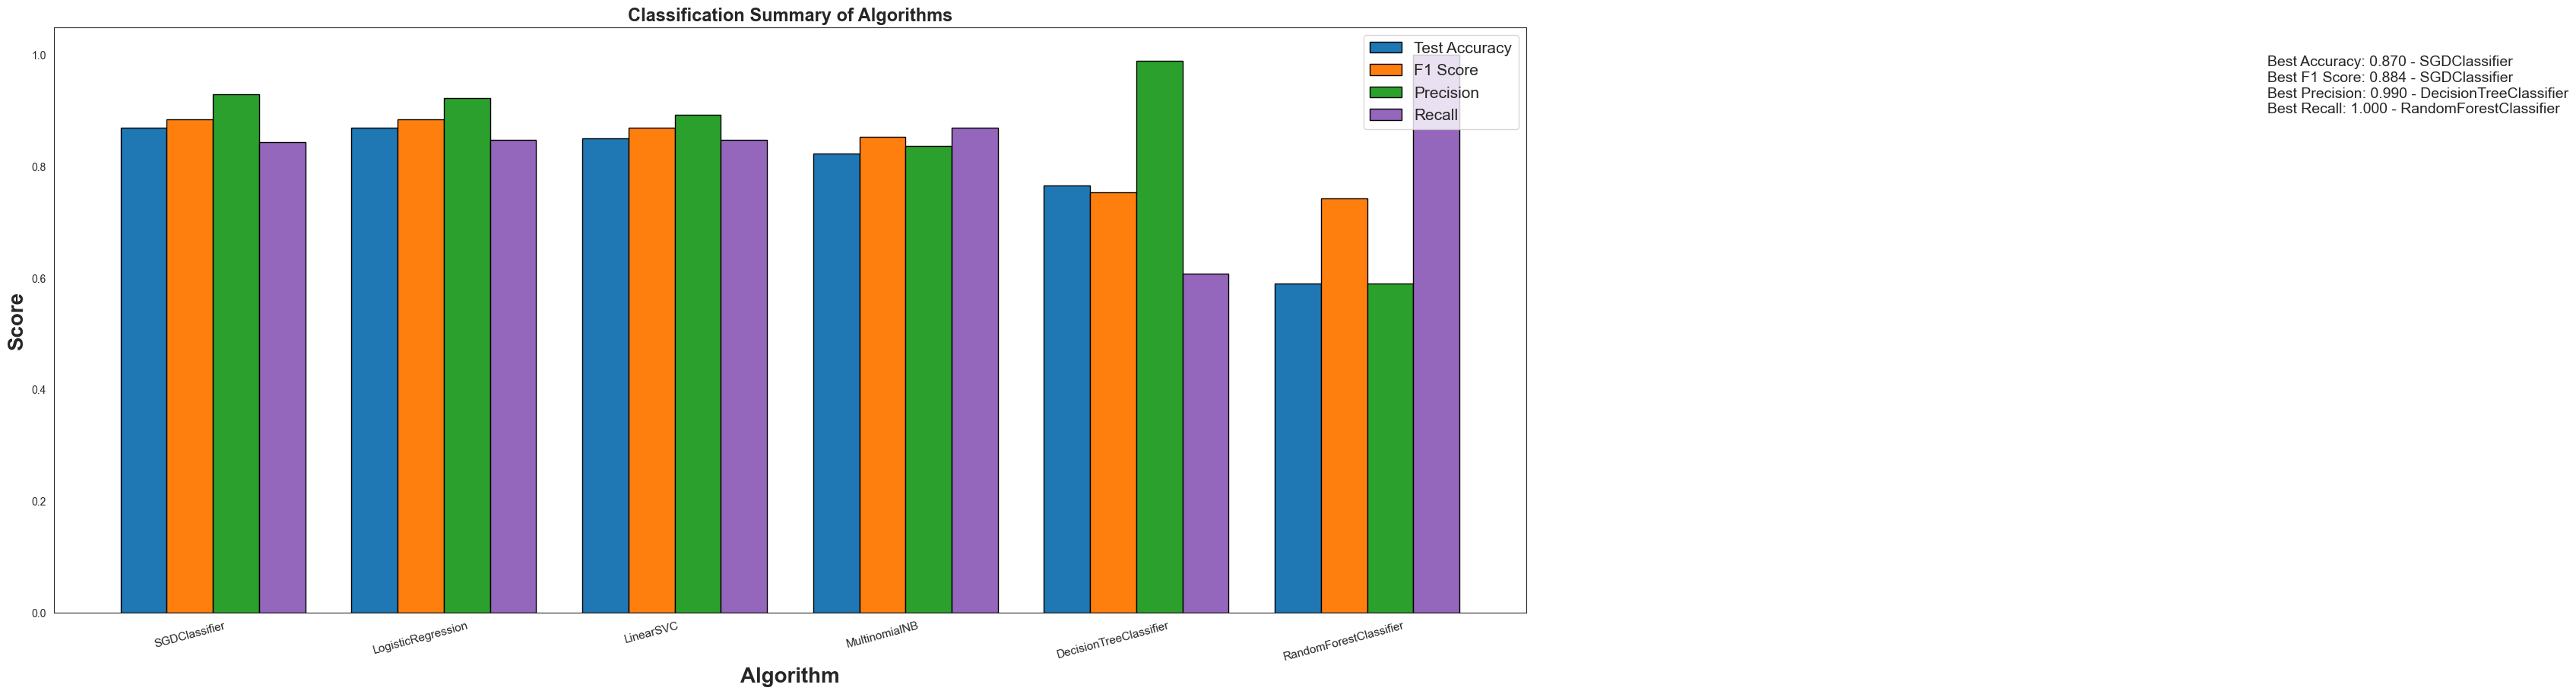

In [34]:
sns.set_style('white')
plt.figure(figsize = (25, 10))
barWidth = 0.20

bars1 = All_Models_Result_List['Accuracy: Test']
bars2 = All_Models_Result_List['F1 Score: Test']
bars3 = All_Models_Result_List['Precision: Test']
bars4 = All_Models_Result_List['Recall: Test']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

palette = sns.color_palette()
plt.bar(r1, bars1, color= palette[0], width=barWidth, edgecolor='black', label='Test Accuracy')
plt.bar(r2, bars2, color= palette[1], width=barWidth, edgecolor='black', label='F1 Score')
plt.bar(r3, bars3, color= palette[2], width=barWidth, edgecolor='black', label='Precision')
plt.bar(r4, bars4, color= palette[4], width=barWidth, edgecolor='black', label='Recall')

plt.xlabel('Algorithm', fontweight='bold', fontsize = 20)
plt.ylabel('Score', fontweight = 'bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], All_Models_Result_List['Algorithm'], rotation = 15, fontsize = 11)

plt.legend(fontsize = 15)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_Accuracy['Accuracy: Test'].values[0], best_Accuracy['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1Score['F1 Score: Test'].values[0], best_f1Score['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_Precision['Precision: Test'].values[0], best_Precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_Recall['Recall: Test'].values[0], best_Recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

plt.text(9.2, 1, textstr, fontsize=14, verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [35]:
# !pip install gradio

In [36]:
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [37]:
# choose the method with best results as classifier
vectorizer = TfidfVectorizer()
classifier = SGDClassifier()
x_train, x_test, y_train, y_test = train_test_split(corpus, y, test_size=0.25)

In [38]:
x_train_transformed = vectorizer.fit_transform(x_train)
classifier.fit(x_train_transformed, y_train)

SGDClassifier()

In [39]:
def predict_comment(comment):
    transformed_comment = vectorizer.transform([comment])
    prediction = classifier.predict(transformed_comment)[0]
    if prediction == 0:
        return "Non-Bullying"
    else:
        return "Bullying"

In [40]:
interface = gr.Interface(
    fn=predict_comment,
    inputs=gr.inputs.Textbox(label="Enter message"),
    outputs="label",
    title="Cyber Bullying Classification",
    description="Enter a message to see whether it is bullying or non_bullying.",
    theme="compact"
)

In [41]:
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
